[Stanford CS224d Advanced	Recursive	Neural	Networks](https://cs224d.stanford.edu/lectures/CS224d-Lecture11.pdf)

# Recursive Neural Tensor Network (RNTN)

[Recursive Deep Models for Semantic Compositionality
Over a Sentiment Treebank](https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf)

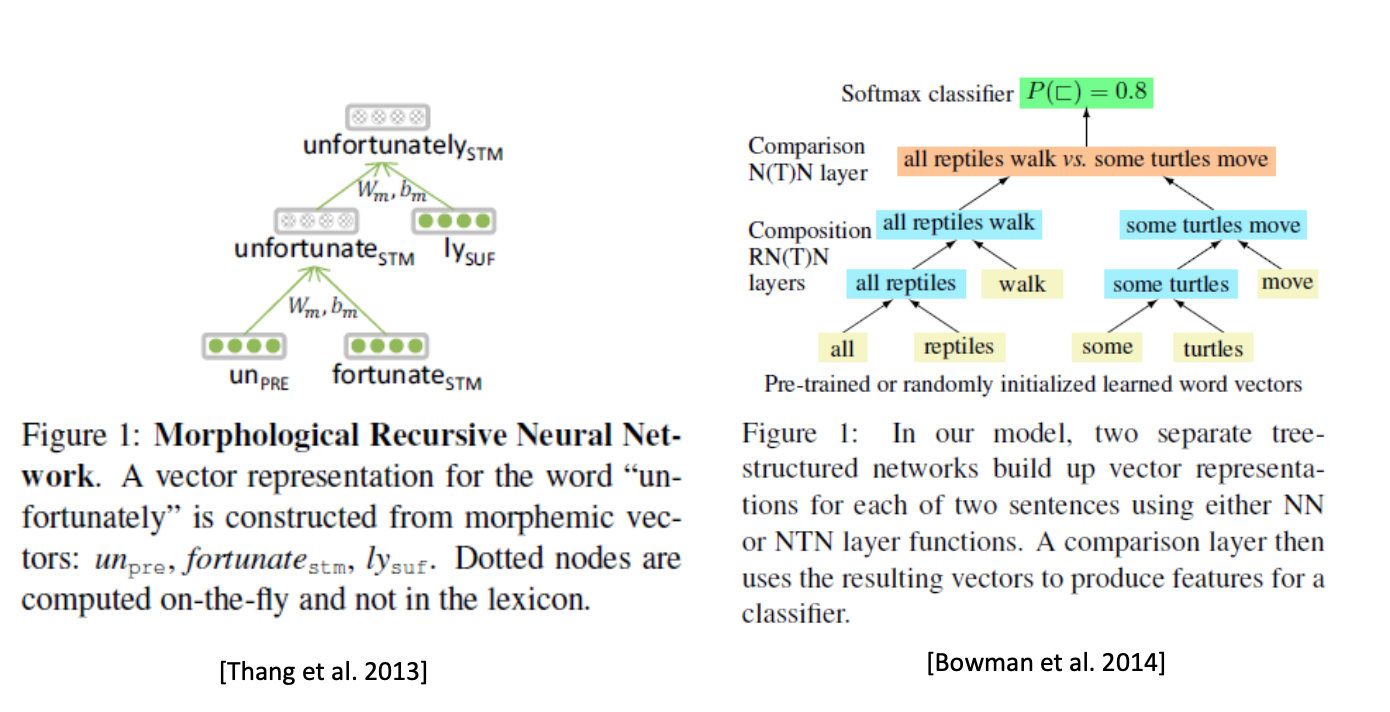

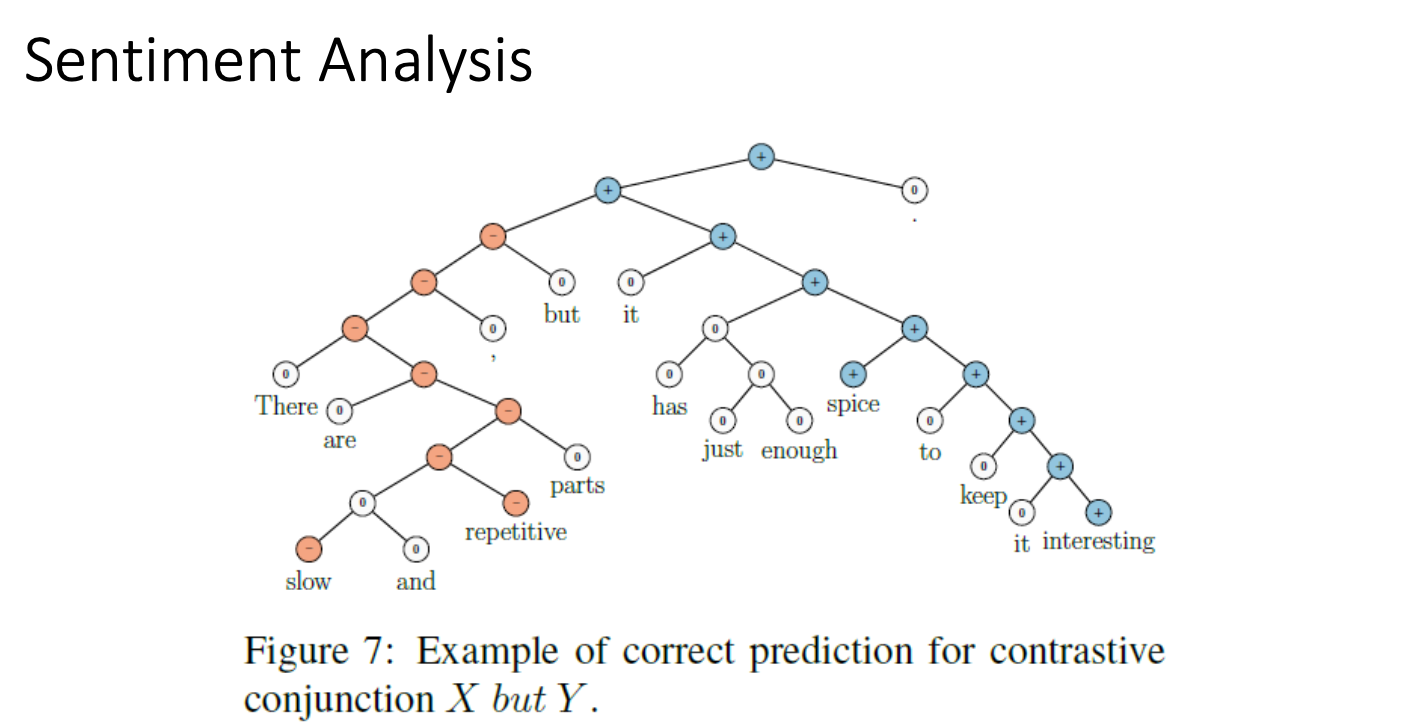

- used for tasks involve compositional representation learning of Hierarchical/tree structure data (e.g., parse tree) e.g., sentiment analysis 

- parse tree: represents the hierarchical structure of a sentence and captures the relationships between words, phrases, and clauses.


- processes the input data in a bottom-up fashion, recursively combining child nodes to form parent nodes until reaching the root node.

    At each level of the tree, use tensor-based composition functions to capture the interactions between the input vectors of child nodes.

    the composition functions can be different at different level, better capture the interactions between different types of words or phrases and learn more expressive representations of the input data.


## architecture

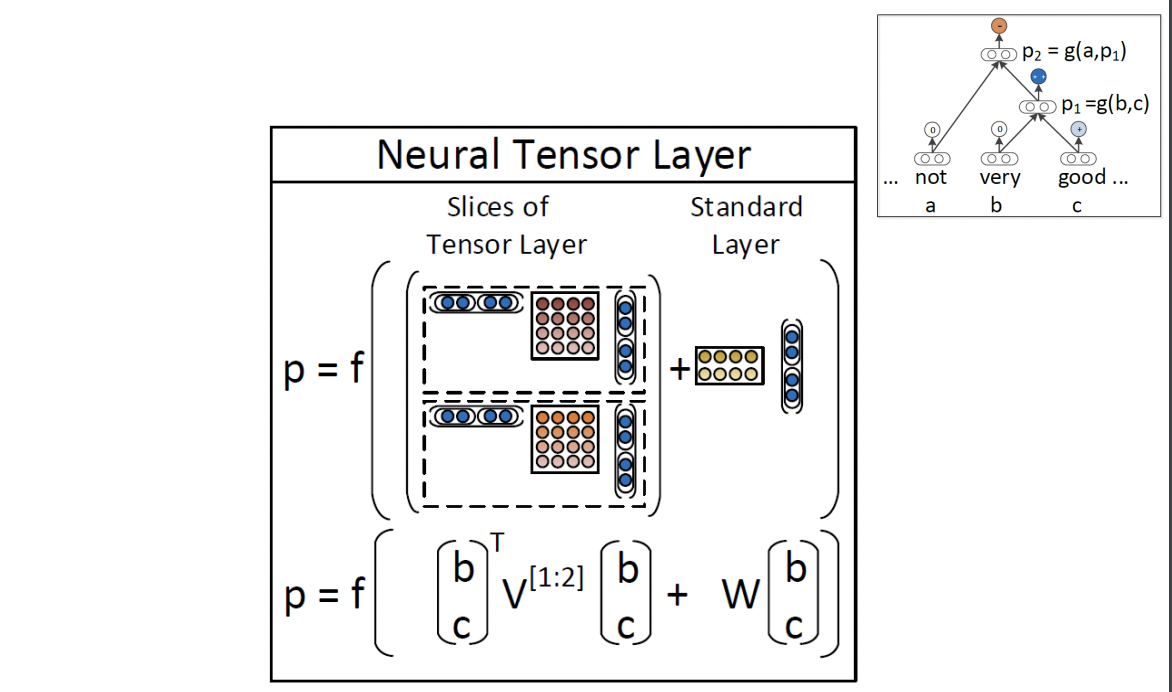

## Algorithm

1. Initialize model parameters: word vectors $V$, tensor $T$, and matrices $W$.

2. Parsing through binary composition: Convert input sentence into a parse tree.

    Binary composition is an approach to combine two elements (e.g., words or phrases) into a single, more complex element, such as a phrase or a larger syntactic constituent. 

3. Recursively process the tree in a bottom-up fashion:

    a. For each node with child nodes $c_1$ and $c_2$, compute their vector representations $x_{c_1}$ and $x_{c_2}$.

    b. obtain parent node representation $x_p \in \mathbb{R}^{d}$: Apply tensor-based composition function to combining the representations of two child nodes. 

    $$x_p = f(\begin{bmatrix}x_{c_1} \\ x_{c_2}\end{bmatrix}^T V^{[1:d]} \begin{bmatrix}x_{c_1} \\ x_{c_2}\end{bmatrix} + W \begin{bmatrix}x_{c_1} \\ x_{c_2}\end{bmatrix} + b)$$

    $W$ is a weight matrix

    $V^{[1:d]} \in \mathbb{R}^{2d \times 2d \times d}$ is tensor that defines multiple bilinear forms. each slice $V^{[i]} \in \mathbb{R}^{d \times d}$

    $f$ is activation, e.g., tanh
       
    c. Continue processing until the root node is reached.

4. Compute the output (e.g., sentiment label) based on the root node's representation.

# stack-augmented RNN

A stack is a last-in, first-out (LIFO) data structure

This property makes it well-suited for modeling nested structures, e.g., a balanced set of parentheses

When processing such structures, elements are pushed down to a stack and popped off when their corresponding closing elements are found. 

##  Recurrent Neural Network Grammars (RNNGs)

paper [Recurrent Neural Network Grammars](https://arxiv.org/pdf/1602.07776.pdf)

- Jointly models parsing and sentence generation as a single, differentiable process

- Combines RNN with a probabilistic context-free grammar (PCFG)

- used for Syntactic parsing and Sentence generation

    - Syntactic parsing: Generate parse trees for input sentences.
    
    - Sentence generation: Generate sentences conditioned on a given parse tree.


### Architecture:

1. Stack-LSTM: Maintains a latent tree structure during parsing

2. Composition function: Combines constituents' hidden states

3. RNN-based parameter generation: Generates rule probabilities for PCFG

4. PCFG: Represents the grammar and generates parse trees

### Objective:

Maximize the log-likelihood of the training data:

$$L(\Theta) = \sum_{i=1}^{N} \log p(y_i | x_i; \Theta)$$

where:
- $N$ is the number of training examples
- $y_i$ is the parse tree for the $i$-th sentence
- $x_i$ is the $i$-th sentence
- $\Theta$ represents the model parameters

### Algorithm:

1. Initialize model parameters: Stack-LSTM, Composition function, RNN, and PCFG.

2. For each sentence in the input data:

    a. Parse the sentence using the Stack-LSTM, guided by the PCFG.

    b. Compute the hidden states of the constituents using the Composition function.

    c. Update the rule probabilities for the PCFG using the RNN-based parameter generation.

    d. Compute the log-likelihood of the parse tree given the sentence and PCFG.

3. Optimize using a gradient-based optimization algorithm.

Recurrent Neural Network Grammars (RNNGs) generate parse trees with a push-down stack by performing a sequence of actions that build the tree structure incrementally. 